In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [2]:
# N contiene il numero delle iterazioni
N=30

# K contiene il numero di valori della funzione che si vogliono calcolare (ossia il numero delle variabili)
K=20

# estremo superiore e estremo inferiore delle frequenze considerate nell'integrale
freq_min=1
freq_max=100

# estremo superiore e estremo inferiore delle masse considerate nell'integrale e scarto tra due masse consecutive
m_min=1
m_max=10

dm= (m_max - m_min)/(K-1)





# massa del sole in kg
M_s=1.989*10**(30)

# unità astronomica in m
UA=1.496*10**(11)

# costante di gravitazione universale in Nm**2/kg**2
G= 6.7*10**(-11)

# costante di gravitazione universale in U.A.**3/(M_S*s**3)
G= (M_s/UA**3)*G





# incertezza sul parametro di Hubble
h_70=0.7

# valore di omega della materia
ome_M=0.3

# valore di omega della materia oscura
ome_DM=0.25

# valore di delta_loc
delta_loc=10**8

# valore del semiasse maggiore in U.A.
a=1

# valore di y definito come e**2 - 1 con e l'eccentricità
y=0.01

xi= y - np.arctan(y)

# costante che moltiplica la funzione omega nell'equazione 18 dell'articolo 2109.11376. (1/10)**2 compare poiche nell'equazione compare (nu/10)**2 (nu in Hz), (1/1000)**2 compare poiché nell'equazione compare (dm1/1000)*(dm2/1000) (m1 e m2 aono in masse solari)

cost= 9.81*10**(-12)*h_70*(ome_M/0.3)**(-1/2)*(ome_DM/0.25)**2*(delta_loc/10**8)*(a/1)*(y/0.01)*(1/10)**2*(1/1000)**2




In [4]:
# contiene il valore di partenza delle variabile

var=np.linspace(0, 10, K)



# lista delle masse indagate nella discretizzazione dell'integrale (sono in masse solari)

freq=np.logspace(np.log10(freq_min), np.log10(freq_max), K)



# lista delle masse indagate nella discretizzazione dell'integrale (sono in masse solari)

masse=np.linspace(m_min, m_max, K)


In [5]:
# funzione per il calcolo di omega in funzione della frequenza secondo un certo modello

def funz_omeg(nu):

    n=len(nu)

    return 1*np.ones(n)



# la funzione usata per costruire le matrici (si tiene conto anche del dm**2 in essa)

def integ(m_1, m_2, nu):

    nu_0= np.sqrt(a**3/(G*(m_1 + m_2)))
    x_0= 2*math.pi*nu_0*nu

    z= dm**2*(1 - y**2 + 4*y**4 + 1.5*(x_0*y**6)/(xi))/( np.exp(2*x_0*xi)*(1 + y**2)**2)

    return z


# la funzione che crea le matrici (si è usata la regola del trapezio, vedi file Prova_costruz_matrice_per_regola_trapez.py)

def fun_mat(nu, K):

    a=np.zeros((K,K))

    for i in range(0,K):

        for j in range(0,K):

            if ( (i+j==0) or (i+j==2*(K-1)) or (i*j==0 and i+j==K-1) ):

                a[i][j]=integ(masse[i], masse[j], nu)/4


# è un elif quindi si possono mettere casi già previsti dall'if precedente dal momento che questi, verificando il primo if, non saranno analizzati dal secondo
            elif ( i*j==0 or i==K-1 or j==K-1 ):

                a[i][j]=integ(masse[i], masse[j], nu)/2

            else:

                a[i][j]=integ(masse[i], masse[j], nu)


In [6]:
# omeg contiene i valori di omega per le frequenze analizzate

omeg=funz_omeg(freq)



In [7]:
# La lista matrix è riempita con delle matrici delle forme quadrariche

matrix=[]

for i in range(0, K):

    matrix.append(fun_mat(freq[i], K))





In [8]:
# Tramite le matrici in matrix sono create le funzioni che vanno a comporre il sistema e che sono inserite nella lista funz

funz=[]

for i in range(0,K):

    def f(*var,i=i):
        vec_dx=np.dot(var,matrix[i])
        return np.dot(vec_dx,var)-omeg[i]


    funz.append(f)



In [9]:
# funzioni per il calcolo delle derivate parziali, queste sono inserite nella lista chiamata deriv (k è l'indice della variabile rispetto alla quale si vuole calcolare la derivata parziale

deriv=[]

for i in range(0, K):

    def f_deriv(*var, l, i=i):

        sum= 2*var[l]*matrix[i][l][l]

        for j in range (0, K):

            if (j!=l):

                sum=sum + 2*var[j]*matrix[i][j][l]

        return sum

    deriv.append(f_deriv)




In [10]:
# Inizializzazione di vari oggetti (F e J contengono rispettivament il valore di ogni funzione del sistema e lo jacobiano calcolati per le soluzioni all'n-esima interazione. var contiene le soluzione all'n-esima interazione

F=np.zeros(K)
J=np.zeros((K,K))



In [31]:
N=15

# Vettori introdotti per poter fare i grafici finali

graf=[]

for i in range(0,K):

    a=np.zeros(N+1)
    graf.append(a)


In [34]:

var=np.linspace(0, 11, K)

# k è l'indice dell'iterazione
for k in range(0,N):


# riempie i vettori per i grafici
    for i in range(0,K):
        graf[i][k]=var[i]

# applicazione metodo di Newton
    for i in range(0,len(F)):

        F[i]=funz[i](*var)

        for j in range(0,len(J[i])):

            J[j][i]=deriv[j](*var, l=i)

    delta=np.linalg.solve(J,F)
    var=var - delta

# inserisce negli array per i grafici i risultati finali ottenuti

for i in range(0,K):
    graf[i][N]=var[i]


In [35]:

# Stampa dei risultati finali

print("\nSoluzioni:\n",var,"\n")


if (K<30):

    print("Funzioni calcolate con i valori delle variabili individuati:")
    for i in range(0,K):
        print("f_{0} =".format(i), funz[i](*var))



Soluzioni:
 [ 1.90329088e+08 -1.00303261e+08 -2.37223011e+08 -1.98543234e+08
  7.83927023e+08 -2.90407536e+08  2.33125549e+07  5.91216357e+07
 -5.39360455e+08  1.39069244e+08 -1.55916437e+08  1.00108090e+08
  4.16131367e+08 -1.06007208e+08 -1.54515875e+08  7.94547463e+06
  1.47317266e+08 -1.10021713e+08  7.96332327e+07 -5.45963259e+07] 

Funzioni calcolate con i valori delle variabili individuati:
f_0 = 9682.886535644531
f_1 = 8601.954223632812
f_2 = 10648.904602050781
f_3 = 12045.66162109375
f_4 = 18055.08917236328
f_5 = 21107.54232788086
f_6 = 25891.564483642578
f_7 = 32564.910217285156
f_8 = 45578.61053466797
f_9 = 54810.714782714844
f_10 = 65491.29602050781
f_11 = 85139.37255859375
f_12 = 116021.935546875
f_13 = 144920.21630859375
f_14 = 176779.32153320312
f_15 = 233227.05810546875
f_16 = 297154.8928222656
f_17 = 366277.931640625
f_18 = 466457.16259765625
f_19 = 613184.7485351562


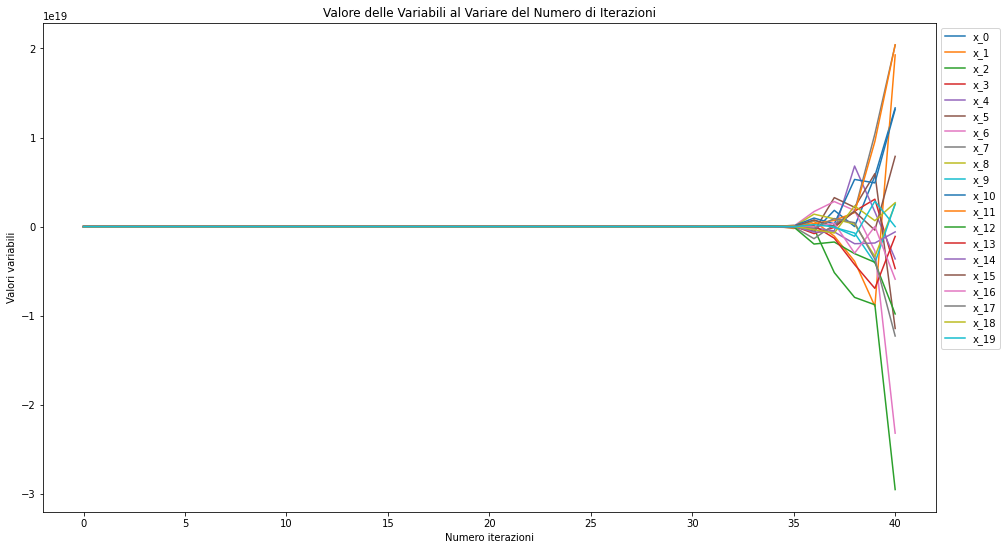

In [20]:
# Grafico degli andamenti delle soluzioni all'aumentare del numero di iterazioni

if (K<30):

    plt.figure(figsize=(16, 9))

    plt.title("Valore delle Variabili al Variare del Numero di Iterazioni")
    plt.xlabel("Numero iterazioni")
    plt.ylabel("Valori variabili")

    iter=np.linspace(0,N,N+1)
    for i in range(0,K):
        plt.plot(iter, graf[i], color="C{0}".format(i), label="x_{0}".format(i), linestyle="-", marker="", markersize=3)

    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()


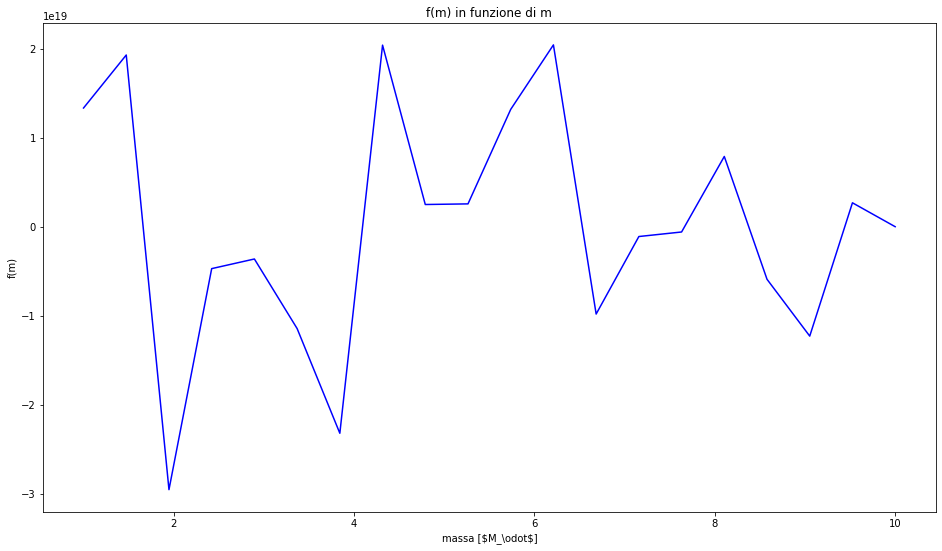

In [21]:

# Grafico della soluzione ottenuta in funzione della massa

plt.figure(figsize=(16, 9))

plt.title("f(m) in funzione di m")
plt.xlabel("massa [$M_\odot\$]")
plt.ylabel("f(m)")


plt.plot(masse, var, color="blue", linestyle="-", marker="")

plt.show()

